In [1]:
# coding: utf-8
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
from numpy import eye
from LoadMZML import LoadMZML
from OptimalMz import OptimalMz
from PlotImage import PlotImage
from LetterRecognition import LetterRecognition
% matplotlib inline

# Parameters

In [2]:
class Parameters:
    def __init__(self):
        #  self.filename = '/Users/simon/Dropbox/MS_Ink_Data/ALphabet/abcdefgh_1.mzML'
        self.filename = '..\\data\\abcdefgh_1.mzML'
        self.lines = 8
        self.widthInMM = 62
        self.heightInMM = 10
        self.downMotionInMM = 1.25

In [3]:
def graphVlines(loadMZML, x_start_mm, x_stop_mm, mzRangeLower, mzRangeHighest):
    start = time.clock()

    data = loadMZML.data
    run = loadMZML.run
    x_start = int(x_start_mm / param.widthInMM * len(data[0]))
    x_stop = int(x_stop_mm / param.widthInMM * len(data[0]))

    mz_g = []
    i_g = []

    for line in range(len(data)):
        sys.stdout.write("\r{0}%".format(line / len(data) * 100))
        sys.stdout.flush()
        for x in range(x_start, x_stop):
            index = data[line][x]
            spectrum = run[index]

            # for (mz, i) in spectrum.peaks:
            #   if mzRangeLower <= mz <= mzRangeHighest:
            for mz, i in LoadMZML.generator(spectrum.peaks, mzRangeLower, mzRangeHighest):
                mz_g.append(mz)
                i_g.append(i)

    sys.stdout.write("\r100%\n")
    end = time.clock()
    print("%.2fs" % (end - start))

    fig = plt.figure()
    plt.plot(mz_g, i_g, 'b^')
    plt.vlines(mz_g, [0], i_g)

    # Save Data
    # np.savetxt('mz_{0}-{1}mm{2}-{3}.csv'.format(x_start_mm, x_stop_mm, mzRangeLower, mzRangeHighest), mz_g,
    # delimiter = ",")
    # np.savetxt('i_g_{0}-{1}mm{2}-{3}.csv'.format(x_start_mm, x_stop_mm, mzRangeLower, mzRangeHighest), i_g,
    # delimiter = ",")
    # plt.savefig('Vlines_{0}-{1}mm{2}-{3}mz.png'.format(x_start_mm, x_stop_mm, mzRangeLower, mzRangeHighest))

In [4]:
param = Parameters()
loadMZML = LoadMZML(param)

# Spectrum of image area 
from x_start_mm to x_stop_mm and mz mzRangeLower <= mz <= mzRangeHighest

100%
1.67s
100%
1.66s


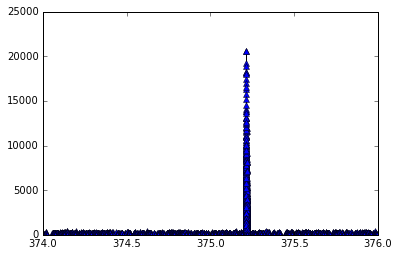

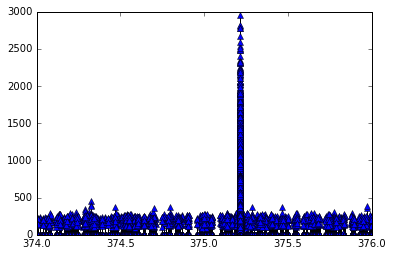

In [5]:
graphVlines(loadMZML, x_start_mm=30, x_stop_mm=40, mzRangeLower=374, mzRangeHighest=376)
graphVlines(loadMZML, x_start_mm=40, x_stop_mm=50, mzRangeLower=374, mzRangeHighest=376)